## XVega Tutorial
##### Note: The example plots here are heavily borrowed from the official Altair tutorial.

### 1. Imports and Data

In [1]:
#include "xvega/xvega.hpp"

In [2]:
using namespace xv;

In [3]:
auto df = url_data().url("https://vega.github.io/vega-datasets/data/cars.json");

### 2. Zero Dimensional Chart

In [4]:
auto mp = mark_point();
auto fig = Chart().data(df).marks({mp});
fig

### 3. One Dimensional Chart

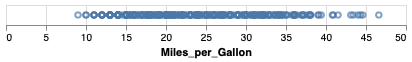

In [5]:
auto x_enc = X().field("Miles_per_Gallon").type("quantitative");
auto enc = Encodings().x(x_enc);
fig = Chart().data(df).marks({mp}).encodings({enc}).width(400);
fig

### 4. Two Dimensional Chart

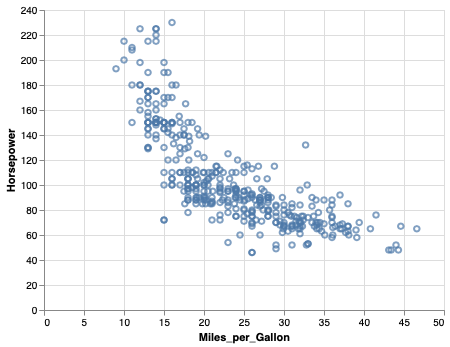

In [6]:
auto y_enc = Y().field("Horsepower").type("quantitative");
enc = Encodings().x(x_enc).y(y_enc);

fig = Chart().data(df).marks({mp}).encodings({enc}).width(400).height(300);
fig

### 5. Third Dimension? 

#### With Categorical data

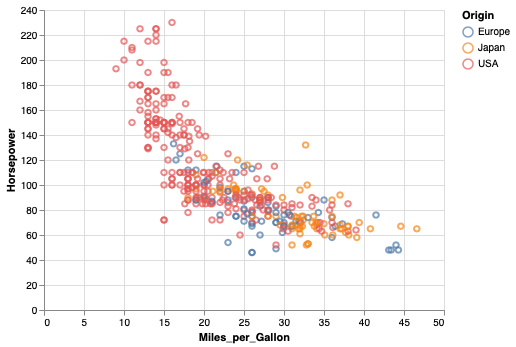

In [7]:
auto color_enc = Color().field("Origin").type("nominal");
enc = Encodings().x(x_enc).y(y_enc).color(color_enc);

fig = Chart().data(df).marks({mp}).encodings({enc}).width(400).height(300);
fig

#### What if the type is changed to Quantitative i.e. Continuous values?

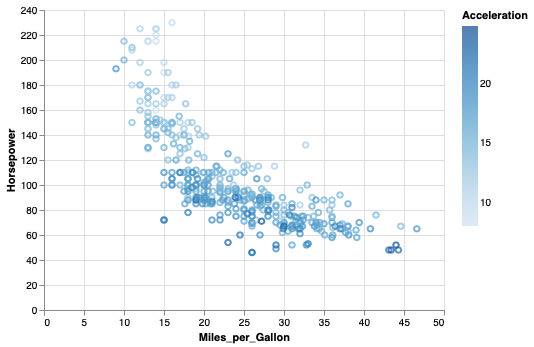

In [8]:
color_enc = Color().field("Acceleration").type("quantitative");
enc = Encodings().x(x_enc).y(y_enc).color(color_enc);

fig = Chart().data(df).marks({mp}).encodings({enc}).width(400).height(300);
fig

### 6. Binning and Aggregation

#### Binning with default parameters

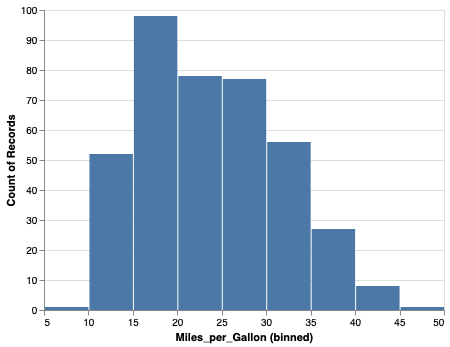

In [10]:
auto mb = mark_bar();
x_enc = X().field("Miles_per_Gallon").type("quantitative").bin(true);
y_enc = Y().aggregate("count");

enc = Encodings().x(x_enc).y(y_enc);

fig = Chart().data(df).marks({mb}).encodings({enc}).width(400).height(300);
fig

#### Binning with more control

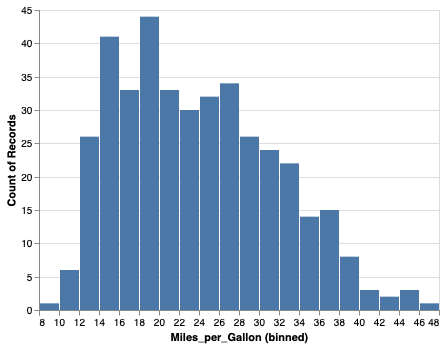

In [11]:
auto bin_params = Bin().maxbins(30);
x_enc = X().field("Miles_per_Gallon").type("quantitative").bin(bin_params);

enc = Encodings().x(x_enc).y(y_enc);

fig = Chart().data(df).marks({mb}).encodings({enc}).width(400).height(300);
fig

#### Let's add the 3rd dimension again!

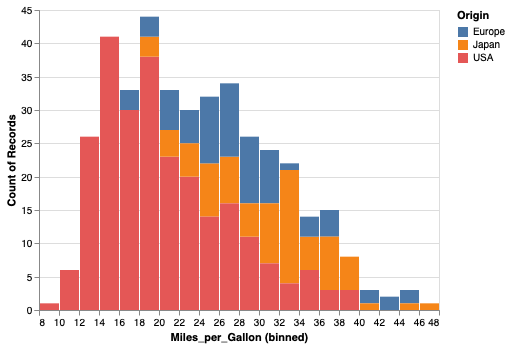

In [12]:
color_enc = Color().field("Origin").type("nominal");
enc = Encodings().x(x_enc).y(y_enc).color(color_enc);

fig = Chart().data(df).marks({mb}).encodings({enc}).width(400).height(300);
fig

#### What about separate plots?

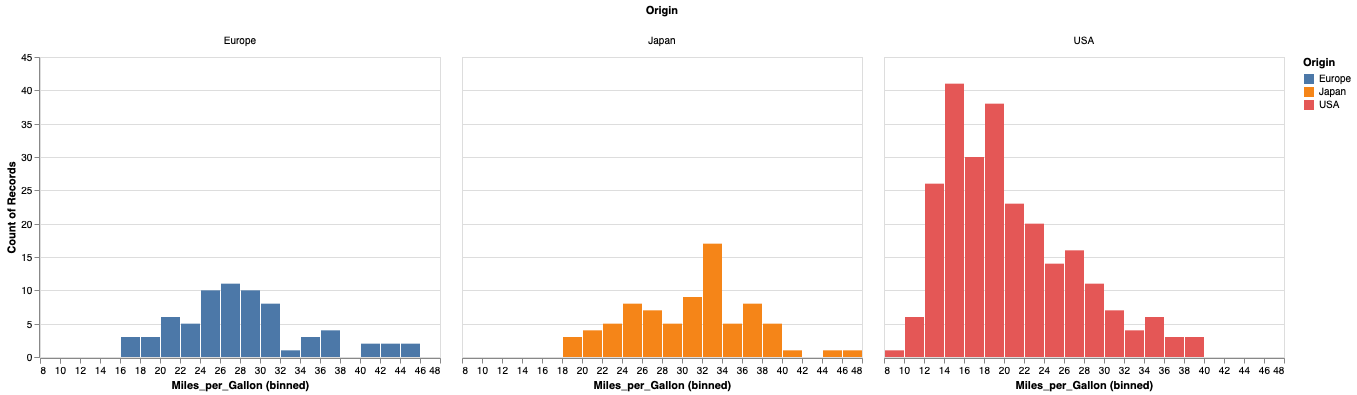

In [13]:
auto column_enc = Column().field("Origin").type("nominal");

enc = Encodings().x(x_enc).y(y_enc).color(color_enc).column(column_enc);

fig = Chart().data(df).marks({mb}).encodings({enc}).width(400).height(300);
fig

#### Binning in Two Dimensions

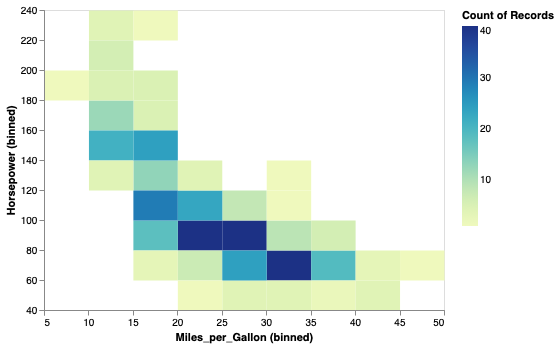

In [14]:
auto mr = mark_rect();

x_enc = X().field("Miles_per_Gallon").type("quantitative").bin(true);
y_enc = Y().field("Horsepower").type("quantitative").bin(true);
color_enc = Color().aggregate("count");

enc = Encodings().x(x_enc).y(y_enc).color(color_enc);

fig = Chart().data(df).marks({mr}).encodings({enc}).width(400).height(300);
fig

#### Let's change the aggregation from counting to mean

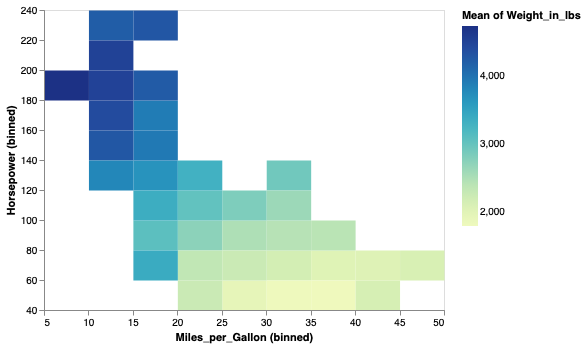

In [15]:
color_enc = Color().field("Weight_in_lbs").type("quantitative").aggregate("mean");

enc = Encodings().x(x_enc).y(y_enc).color(color_enc);

fig = Chart().data(df).marks({mr}).encodings({enc}).width(400).height(300);
fig

### 7. Time Series and Layering

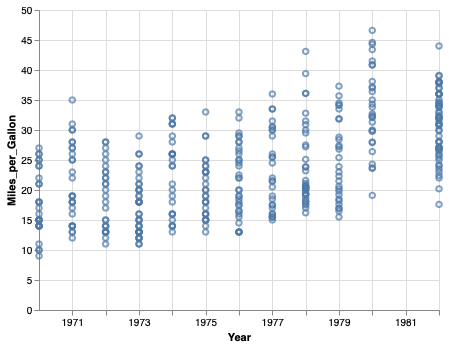

In [16]:
x_enc = X().field("Year").type("temporal");
y_enc = Y().field("Miles_per_Gallon").type("quantitative");

enc = Encodings().x(x_enc).y(y_enc);

fig = Chart().data(df).marks({mp}).encodings({enc}).width(400).height(300);
fig

#### Let's plot the mean instead of all points

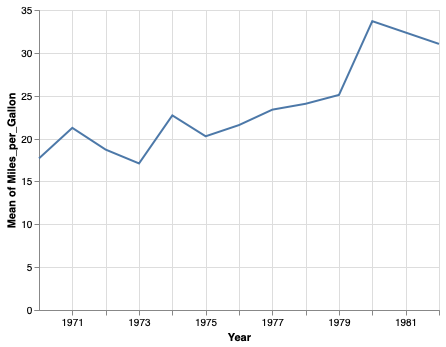

In [17]:
auto ml = mark_line();
y_enc = Y().field("Miles_per_Gallon").type("quantitative").aggregate("mean");

enc = Encodings().x(x_enc).y(y_enc);

fig = Chart().data(df).marks({ml}).encodings({enc}).width(400).height(300);
fig

#### We can also plot the confidence interval of the estimated mean

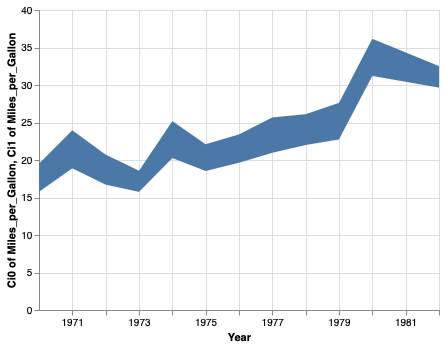

In [18]:
auto ma = mark_area();
y_enc = Y().field("Miles_per_Gallon").type("quantitative").aggregate("ci0");
auto y2_enc = Y2().field("Miles_per_Gallon").aggregate("ci1");

enc = Encodings().x(x_enc).y(y_enc).y2(y2_enc);

fig = Chart().data(df).marks({ma}).encodings({enc}).width(400).height(300);
fig

#### Let's Adjust the Chart by configuring Opacity, adding a cleaner Y Axis Title and splitting it by Country of Origin

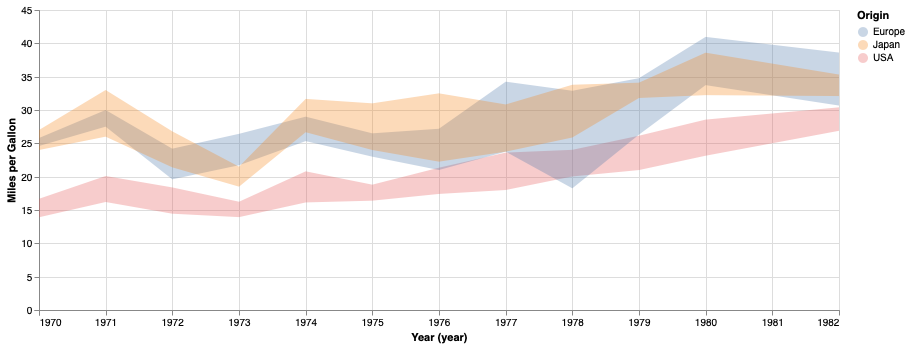

In [19]:
ma = mark_area().opacity(0.3);
x_enc = X().field("Year").type("temporal").timeUnit("year");

std::vector<std::string> title_text = {"Miles per Gallon"};
auto ax = Axis().title(title_text);

y_enc = Y().field("Miles_per_Gallon").type("quantitative").aggregate("ci0").axis(ax);
color_enc = Color().field("Origin").type("nominal");

enc = Encodings().x(x_enc).y(y_enc).y2(y2_enc).color(color_enc);

fig = Chart().data(df).marks({ma}).encodings({enc}).width(800).height(300);
fig

#### Let's represent the mean on top of the confidence interval

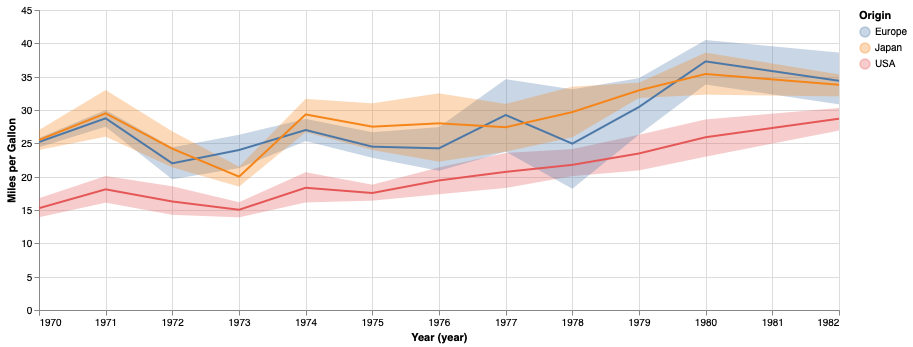

In [20]:
auto y_enc_2 = Y().field("Miles_per_Gallon").type("quantitative").aggregate("mean");

auto enc_2 = Encodings().x(x_enc).y(y_enc_2).color(color_enc);

fig = Chart().data(df).marks({ma, ml}).encodings({enc, enc_2}).width(800).height(300);
fig

### 8. Transformations

#### Let's do some Polynomial Regression on Horsepower vs. Miles per Gallon

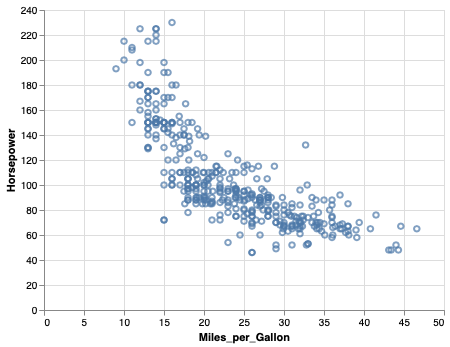

In [21]:
x_enc = X().field("Miles_per_Gallon").type("quantitative");
y_enc = Y().field("Horsepower").type("quantitative");

enc = Encodings().x(x_enc).y(y_enc);

fig = Chart().data(df).marks({mp}).encodings({enc}).width(400).height(300);
fig

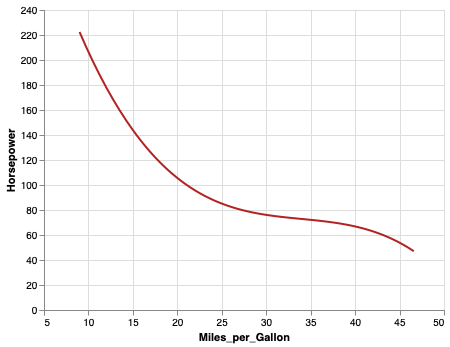

In [22]:
auto regr = transform_regression().regression("Horsepower").on("Miles_per_Gallon").method("poly");

ml = mark_line().color("firebrick");

fig = Chart().data(df).marks({ml}).encodings({enc}).transformations({regr}).width(400).height(300);
fig

#### [Advanced] Let's create a Mosiac Chart using Stack Transformations twice!

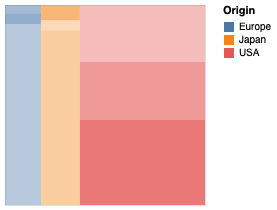

In [23]:
auto agg_field = aggregate_field_def().op("count").as("count_*");
std::vector<std::string> group_fields = {"Origin", "Cylinders"};
auto agg_vec = {agg_field};
auto agg = transform_aggregate().aggregate(agg_vec).groupby(group_fields);

auto sort_field = sort_field_def().field("Origin").order("ascending");
auto sort_vec = {sort_field};
std::vector<std::string> as_fields = {"stack_count_Origin1", "stack_count_Origin2"};
std::vector<std::string> emp = {};
auto stck = transform_stack().stack("count_*").offset("normalize").sort(sort_vec).as(as_fields).groupby(emp);

auto join_agg_field_1 = join_aggregate_field_def().op("min").field("stack_count_Origin1").as("x");
auto join_agg_field_2 = join_aggregate_field_def().op("max").field("stack_count_Origin2").as("x2");
auto join_agg_vec = {join_agg_field_1, join_agg_field_2};
std::vector<std::string> grp_vec = {"Origin"};
auto join_agg = transform_join_aggregate().joinaggregate(join_agg_vec).groupby(grp_vec);

std::vector<std::string> as_fields_2 = {"y", "y2"};
auto sort_field_2 = sort_field_def().field("Cylinders").order("ascending");
auto sort_vec_2 = {sort_field};

auto stck_2 = transform_stack().stack("count_*").offset("normalize").sort(sort_vec_2).as(as_fields_2).groupby(grp_vec);

mr = mark_rect();

x_enc = X().field("x").type("quantitative").axis(nullptr);
auto x2_enc = X2().field("x2");
y_enc = Y().field("y").type("quantitative").axis(nullptr);
y2_enc = Y2().field("y2");

auto opacity_enc = Opacity().field("Cylinders").type("quantitative").legend(nullptr);

color_enc = Color().field("Origin").type("nominal");

auto tooltip_enc_1 = Tooltip().field("Origin").type("nominal");
auto tooltip_enc_2 = Tooltip().field("Cylinders").type("quantitative");
auto t = {tooltip_enc_1, tooltip_enc_2};

enc = Encodings().x(x_enc).y(y_enc).x2(x2_enc).y2(y2_enc).opacity(opacity_enc).tooltip(t).color(color_enc);

fig = Chart().data(df).marks({mr}).encodings({enc}).transformations({agg, stck, join_agg, stck_2});
fig

#### [Advanced] Layering Text on a Heatmap with dynamic thresholding using Transforms

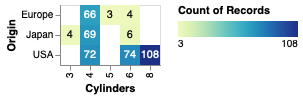

In [24]:
auto agg_field_2 = aggregate_field_def().op("count").as("num_cars");
auto agg_vec_2 = {agg_field_2};
std::vector<std::string> group_fields_2 = {"Origin", "Cylinders"};
auto agg_2 = transform_aggregate().aggregate(agg_vec_2).groupby(group_fields_2);

auto join_agg_field = join_aggregate_field_def().op("max").field("num_cars").as("max_num_cars");
auto join_agg_vec_2 = {join_agg_field};
auto join_agg_2 = transform_join_aggregate().joinaggregate(join_agg_vec_2);

auto calc = transform_calculate().calculate("datum.num_cars > 0.5 * datum.max_num_cars").as("more_than_half");

auto leg = Legend().direction("horizontal").gradientLength(120);

x_enc = X().field("Cylinders").type("ordinal");
y_enc = Y().field("Origin").type("ordinal");
std::vector<std::string> til = {"Count of Records"};
color_enc = Color().field("num_cars").type("quantitative").title(til).legend(leg);

enc = Encodings().x(x_enc).y(y_enc).color(color_enc);

auto text_enc = Text().field("num_cars").type("quantitative");
std::vector<bool> bool_vec = {false, true};
std::vector<std::string> range_params = {"black", "white"};
auto scale_params = Scale().range(range_params).domain(bool_vec);
auto color_enc_2 = Color().field("more_than_half").type("nominal").legend(nullptr).scale(scale_params);

auto mt = mark_text();
enc_2 = Encodings().x(x_enc).y(y_enc).color(color_enc_2).text(text_enc);

fig = Chart().data(df).marks({mr, mt}).encodings({enc, enc_2}).transformations({agg_2, join_agg_2, calc});
fig

### 9. Sneak Peek on Selections and Interactivity

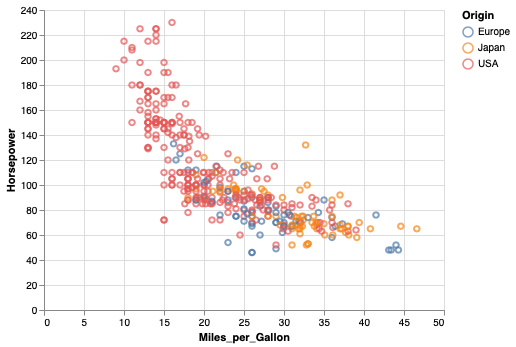

In [25]:
auto si = selection_interval();

x_enc = X().field("Miles_per_Gallon").type("quantitative");
y_enc = Y().field("Horsepower").type("quantitative");

color_enc = Color().field("Origin").type("nominal");
enc = Encodings().x(x_enc).y(y_enc).color(color_enc);

fig = Chart().data(df).marks({mp}).encodings({enc}).selections({si}).width(400).height(300);
fig

#### Customising the Interval Selection

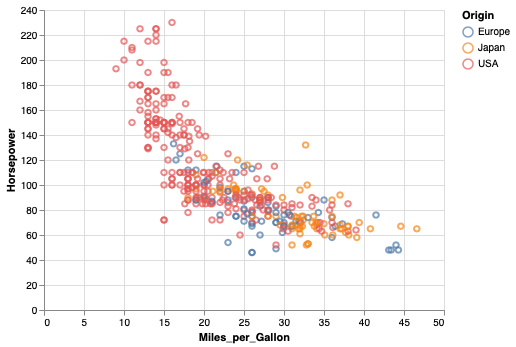

In [26]:
std::vector<std::string> si_props = {"y"};
si = selection_interval().encodings(si_props);

fig = Chart().data(df).marks({mp}).encodings({enc}).selections({si}).width(400).height(300);
fig

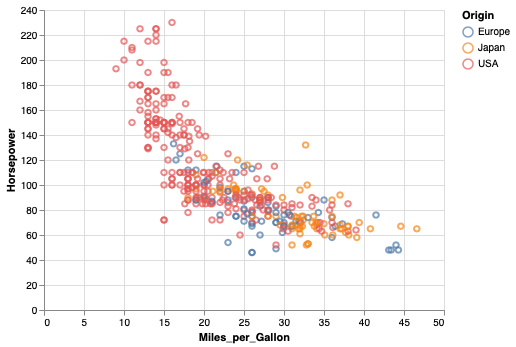

In [27]:
si = selection_interval().bind("scales");

auto tooltip_enc = Tooltip().field("Name").type("nominal");
auto to = {tooltip_enc};

enc = Encodings().x(x_enc).y(y_enc).color(color_enc).tooltip(to);

fig = Chart().data(df).marks({mp}).encodings({enc}).selections({si}).width(400).height(300);
fig

##### Note: While single and multi selections also work, it would be futile to demo them without conditions and conditions haven't been implemented as of now.

### Coming Soon!
- Support for Conditions
- Support for View Compositions (Horizontal and Vertical Concatenation, etc.)
- Chart Configurations